In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
import sys
sys.path.append("../")
import preprocessing.skeletonnormalization as sn
import preprocessing.get_data as gd
#from data_collection.find_r import *

In [8]:
# load normalized training data
train = gd.load_data('../pickle/norm_train.p')
# a08_s01_e01_skeleton_proj.txt         hands raised over head
# a10_s06_e02_skeleton_proj.txt         wave
# select a sequence of frames from the training data
#action_data = train["a08_s01_e01_skeleton_proj.txt"]
action_data = train["a08_s01_e02_skeleton_proj.txt"]

[array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00, -1.73153888e-02,
         5.10348301e-02,  4.55668126e-02],
       [ 1.00000000e+00,  3.00000000e+00, -2.30719969e-02,
         3.67648279e-01,  4.36479432e-02],
       [ 1.00000000e+00,  4.00000000e+00, -2.74148541e-03,
         5.70953394e-01,  5.04247804e-02],
       [ 1.00000000e+00,  5.00000000e+00, -2.12321521e-01,
         3.26907062e-01,  2.78260498e-04],
       [ 1.00000000e+00,  6.00000000e+00, -2.71485768e-01,
         9.81975101e-02, -3.59267264e-02],
       [ 1.00000000e+00,  7.00000000e+00, -2.79373581e-01,
        -1.26605141e-01, -9.01554362e-02],
       [ 1.00000000e+00,  8.00000000e+00, -2.75481064e-01,
        -2.03482352e-01, -1.11564280e-01],
       [ 1.00000000e+00,  9.00000000e+00,  1.58809312e-01,
         3.29357477e-01,  1.25015897e-01],
       [ 1.00000000e+00,  1.00000000e+01,  2.03750161e-01,
         9.76036876e-0

In [4]:
# initialize joint colors of skeleton
colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black

In [5]:
def attemp1(all_frames):
    for i in range(len(all_frames)):
        all_frames[i] = gaussian_filter1d(all_frames[i], 1)
    return all_frames

In [6]:
from scipy.ndimage import gaussian_filter1d
import cv2

kernel = np.array(cv2.getGaussianKernel(ksize=5,sigma=1))
kernel = np.transpose(kernel)
all_frames = [np.array(i)[:,2:] for i in action_data]

mat_slice = np.array(all_frames[0][:5,:3])

print(mat_slice)
print()
print(kernel)
print()
print(np.dot(kernel, mat_slice))


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.73153888e-02  5.10348301e-02  4.55668126e-02]
 [-2.30719969e-02  3.67648279e-01  4.36479432e-02]
 [-2.74148541e-03  5.70953394e-01  5.04247804e-02]
 [-2.12321521e-01  3.26907062e-01  2.78260498e-04]]

[[0.05448868 0.24420134 0.40261995 0.24420134 0.05448868]]

[[-0.02575628  0.31772563  0.04102997]]


<IPython.core.display.Javascript object>


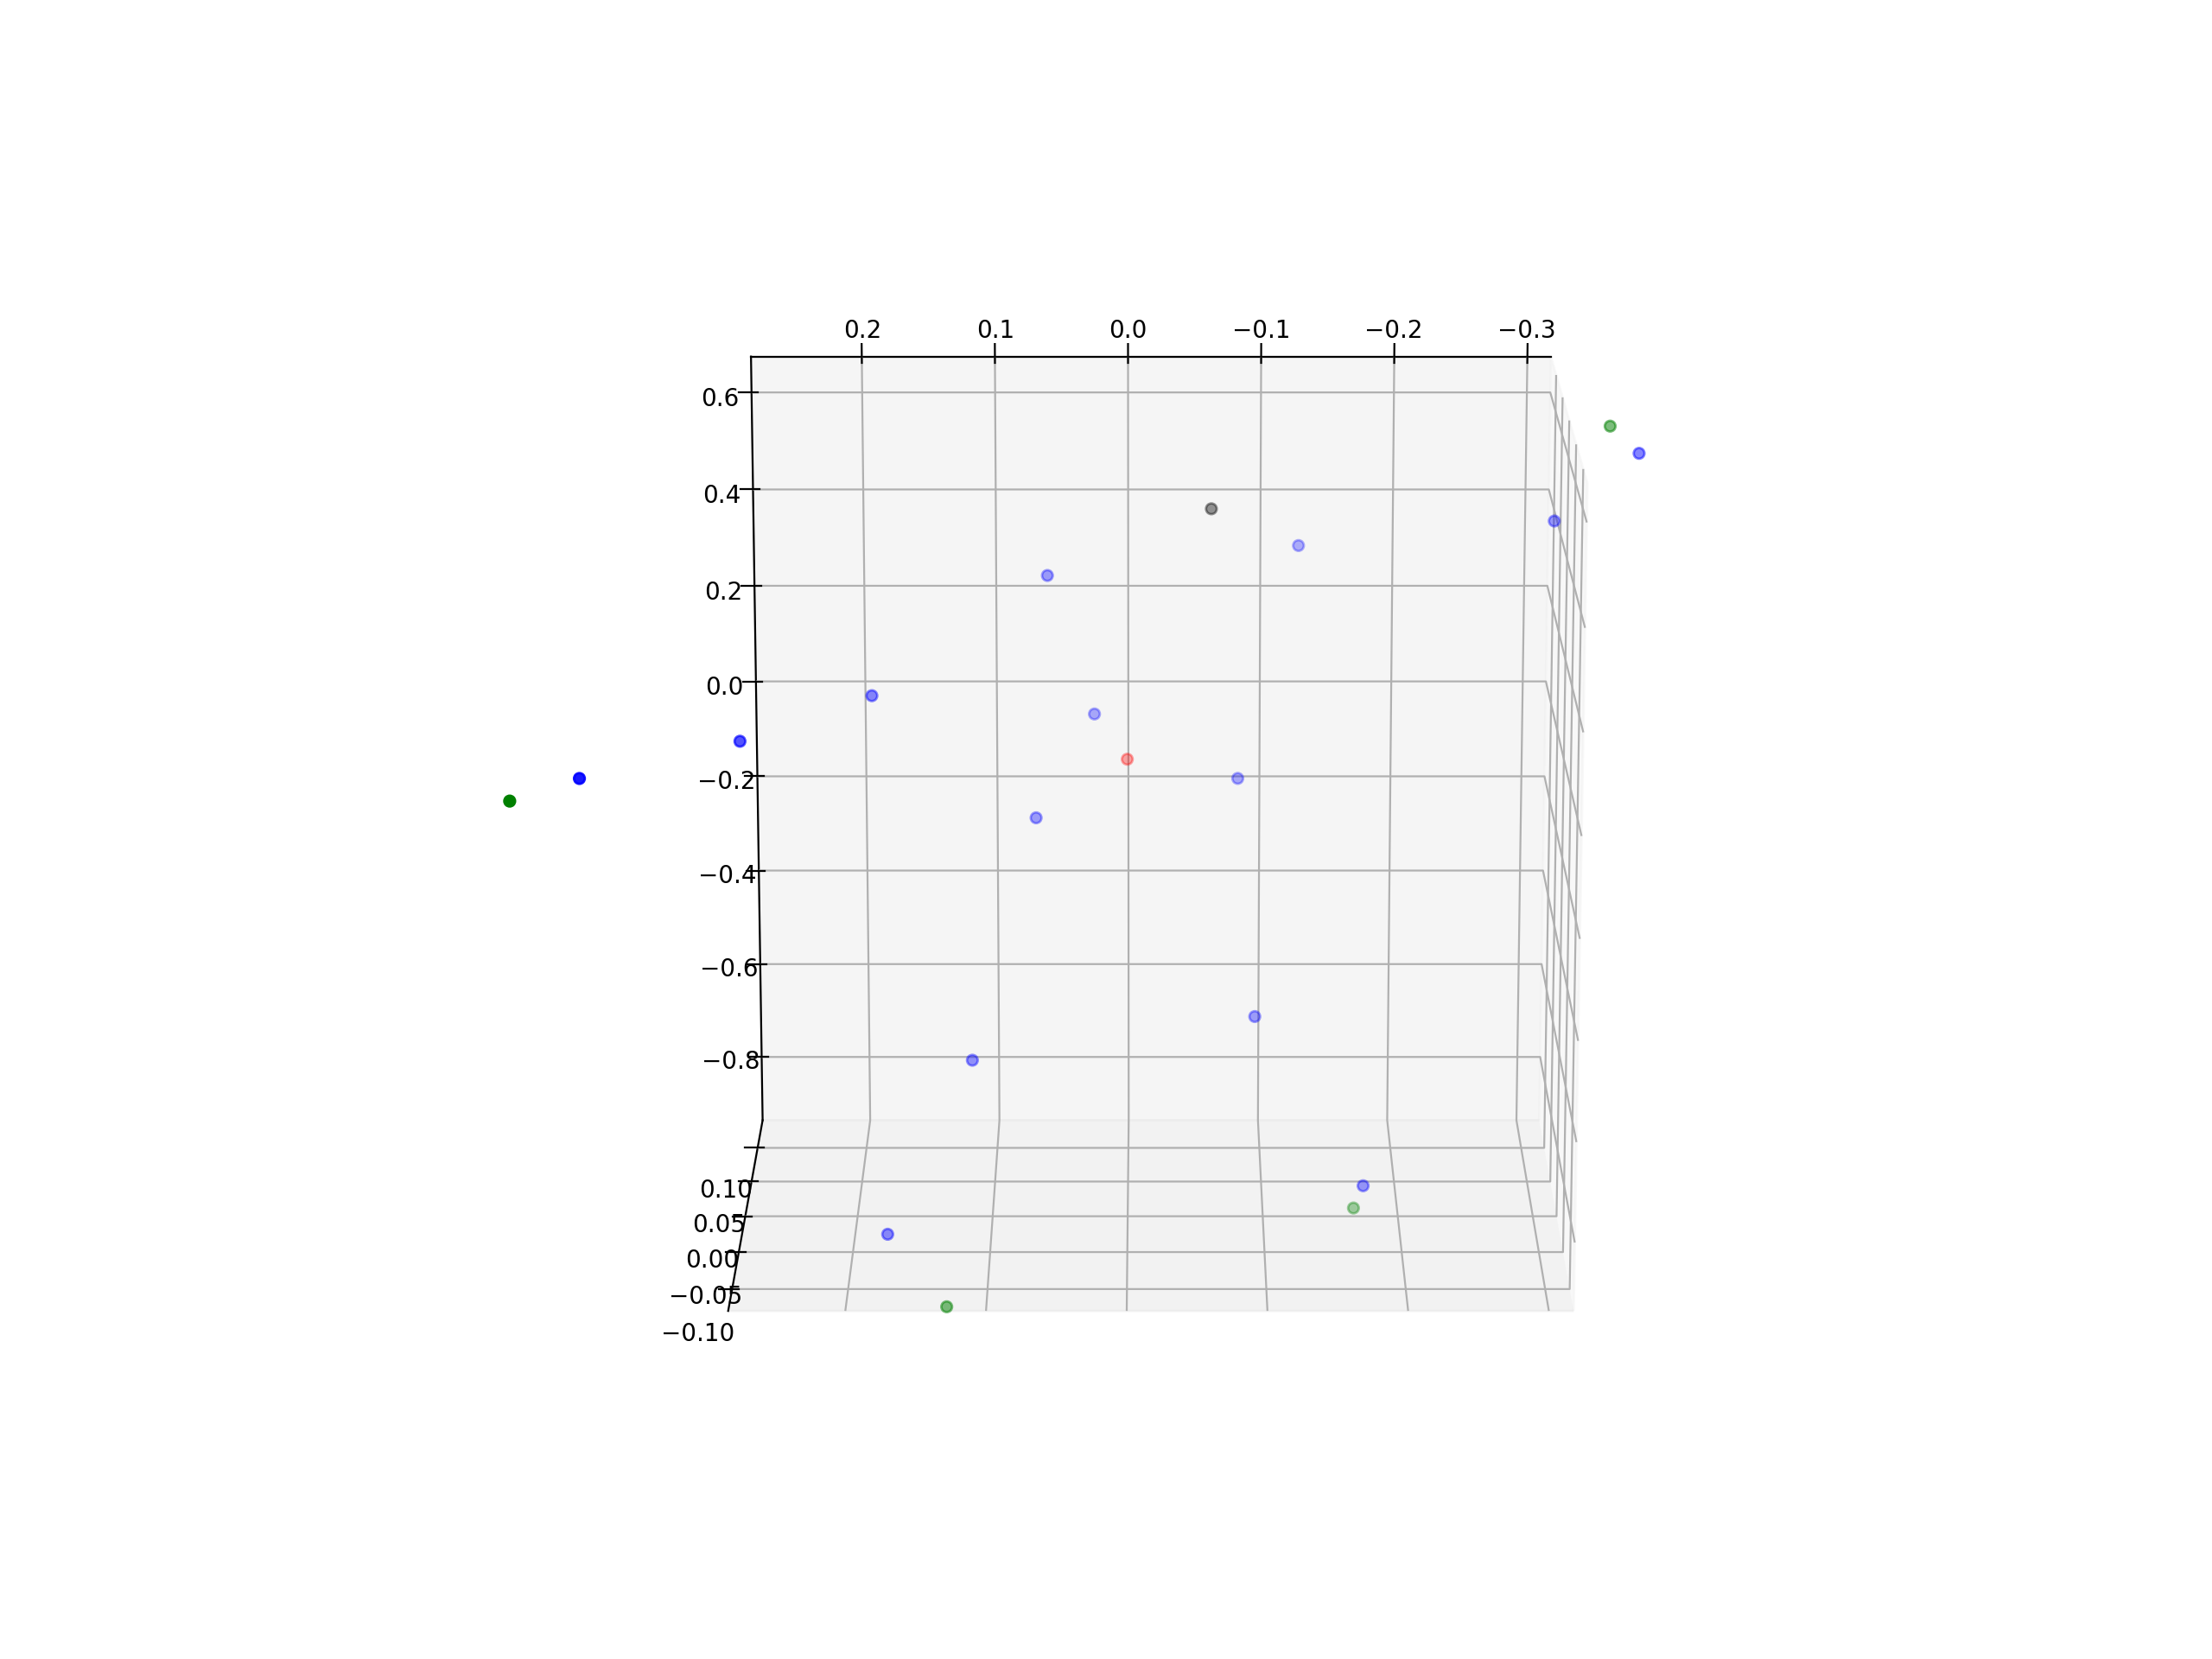

In [7]:
import matplotlib.animation

# get array of all frames without joint number or frame number
all_frames = [np.array(i)[:,2:] for i in action_data]
max_frame = len(all_frames)


def update_graph(frame_data):
    xs, ys, zs = frame_data[:,0], frame_data[:,1], frame_data[:,2]
    graph._offsets3d = (xs, ys, zs)
#     p1 = [xs[2], ys[2], zs[2]]
#     p2 = [xs[4], ys[4], zs[4]]
#     temp = plt.plot(p1, p2)
    return graph


fig = plt.figure()
#fig.set_size_inches(9.5, 9.5)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-75,  90)
points = all_frames[0]
graph = ax.scatter(points[:,0], points[:,1], points[:,2], color=colors)

#xs, ys, zs = all_frames[0][:,0], all_frames[0][:,1], all_frames[0][:,2] ; print(xs)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, all_frames, interval=90)